In [307]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [308]:
df = pd.read_csv('severeinjury 010115-310118.csv', encoding='unicode_escape')

# Data Pre-processing

## Exploratory Data Analysis

In [309]:
df.head()

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,...,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,Two Mile Drive,NaN,OTISVILLE,NEW YORK,10963.0,41.46,...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,5772.0,Inmate or detainee in custody
1,2015010016,930267,1/1/2015,Kalahari Manufacturing LLC,171 Progress Drive,NaN,LAKE DELTON,WISCONSIN,53940.0,43.59,...,1522,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",NaN,NaN
2,2015010018,929823,1/1/2015,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,NaN,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,...,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",741.0,Ladders-fixed
3,2015010019,929711,1/1/2015,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,NaN,MACON,GEORGIA,31206.0,32.77,...,1972,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,8420.0,"Truck-motorized freight hauling and utility, u..."
4,2015010020,929642,1/1/2015,North American Pipe Corporation,210 South Arch Street,NaN,JANESVILLE,WISCONSIN,53545.0,42.67,...,111,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",NaN,NaN


In [310]:
df.describe()

,ID,UPA,Zip,Latitude,Longitude,Hospitalized,Amputation,Inspection,Nature,Part of Body,Event,Source,Secondary Source
count,3.129800e+04,3.129800e+04,31285.000000,31284.000000,31284.000000,31298.000000,31296.000000,1.105000e+04,31298.000000,31298.000000,31298.000000,31298.000000,8377.000000
mean,4.249925e+09,1.122207e+06,47512.908742,36.717400,-87.687979,0.808103,0.270194,1.161277e+06,872.920314,2223.117931,3908.832002,4818.359224,5159.590665
std,5.962899e+09,1.067308e+05,25089.683587,5.526223,11.522027,0.410718,0.449289,7.773772e+04,767.176878,2720.359782,2511.156788,2908.851445,3238.035044
min,2.015010e+09,8.674120e+05,801.000000,-15.780000,-170.710000,0.000000,0.000000,8.371470e+05,7.000000,6.000000,20.000000,10.000000,10.000000
25%,2.015108e+09,1.029155e+06,30309.000000,32.130000,-95.500000,1.000000,0.000000,1.095968e+06,111.000000,320.000000,642.000000,3222.000000,2214.000000
50%,2.016087e+09,1.121412e+06,45208.000000,38.790000,-87.650000,1.000000,0.000000,1.162585e+06,1311.000000,513.000000,4331.000000,4152.000000,4418.000000
75%,2.017076e+09,1.211848e+06,72315.000000,41.100000,-80.590000,1.000000,1.000000,1.227324e+06,1311.000000,4422.000000,6252.000000,7125.750000,8621.000000
max,2.017121e+10,1.378179e+06,99901.000000,61.290000,145.760000,5.000000,9.000000,1.315854e+06,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31298 entries, 0 to 31297
Data columns (total 26 columns):
ID                        31298 non-null int64
UPA                       31298 non-null int64
EventDate                 31298 non-null object
Employer                  31298 non-null object
Address1                  31286 non-null object
Address2                  2747 non-null object
City                      31287 non-null object
State                     31298 non-null object
Zip                       31285 non-null float64
Latitude                  31284 non-null float64
Longitude                 31284 non-null float64
Primary NAICS             31296 non-null object
Hospitalized              31298 non-null int64
Amputation                31296 non-null float64
Inspection                11050 non-null float64
Final Narrative           31298 non-null object
Nature                    31298 non-null int64
NatureTitle               31297 non-null object
Part of Body              3

In [312]:
df['EventDate'] = pd.to_datetime(df['EventDate'])
df['EventYear'] = df['EventDate'].apply(lambda time: time.year)
df['EventMonth'] = df['EventDate'].apply(lambda time: time.month)
df['EventDay'] = df['EventDate'].apply(lambda time: time.day)
df['EventDayofWeek'] = df['EventDate'].apply(lambda time: time.dayofweek)

# Map numeric output (0-6) to strings
mmap = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',
       9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['EventDayofWeek'] = df['EventDayofWeek'].map(dmap)
df['EventMonth'] = df['EventMonth'].map(mmap)

Added a few features form the EventDate column

Text(0.5, 1.0, 'Number of Accidents in a Year')

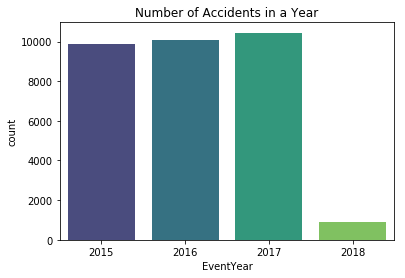

In [313]:
sns.countplot(x='EventYear', data = df, palette='viridis')
plt.title('Number of Accidents in a Year')

Number of accidents seems to have risen year by year from 2015 to 2017. Furthermore, only a few data points occurred in 2018.

Text(0.5, 1.0, 'Number of Accidents in each Month')

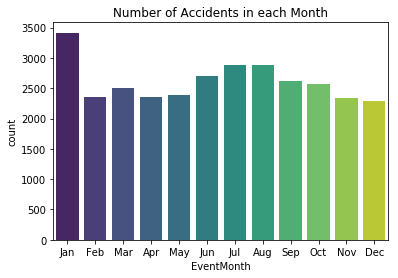

In [314]:
sns.countplot(x='EventMonth', data = df, palette='viridis')
plt.title('Number of Accidents in each Month')

January, July and August seem to be the most accident-prone months of the year.

Text(0.5, 1.0, 'Number of Accidents in a week')

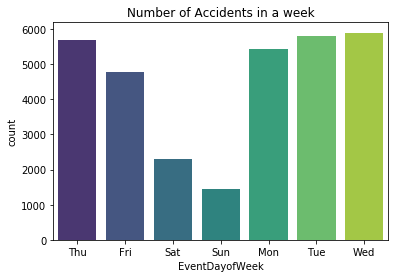

In [315]:
sns.countplot(x='EventDayofWeek', data = df, palette='viridis')
plt.title('Number of Accidents in a week')

Accidents tend to peak mid week and then reduce over the weekends, which makes sense as the number of people working falls during the weekends.

In [316]:
df['Corrected_State'] = df['State'].str.lower().str.title()
df_plot = df.groupby(by='Corrected_State').count()
df_plot = df_plot.reset_index()

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}
df_plot['State_Abrv'] = df_plot['Corrected_State'].map(us_state_abbrev)
df_plot.sort_values(by='ID', ascending=False)
# Remove NAs
df_plot = df_plot.dropna()

In [317]:
for col in df_plot.columns:
    df_plot[col] = df_plot[col].astype(str)

# scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
#             [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df_plot['text'] = df_plot['Corrected_State']+'<br>'+'Number of Accidents: '+df_plot['ID']
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef",
                  "#b3d2e9", "#9ecae1", "#85bcdb", "#6baed6", "#57a0ce",
                  "#4292c6", "#3082be", "#2171b5", "#1361a9", "#08519c",
                  "#0b4083","#08306b"]
data = [dict(
        type='choropleth',
        autocolorscale = True,
        locations = df_plot['State_Abrv'],
        z = df_plot['ID'].astype(float),
        locationmode = 'USA-states',
        text = df_plot['text'],
        marker = dict(
            line = dict(
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "No. of Accidents")
) ]

layout = dict(
    title = 'Accidents per State from 2015-2018',
    geo = dict(
        scope='usa',
        projection=dict( type='albers usa' ),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'
    )
)

fig = dict(data=data, layout=layout)

url = iplot(fig, filename='choropleth_map')

We can see that most of the accidents are concentrated in the central to east states. This suggests that we can look into the safety policies in the western states and compare them with safety policies in the central to east states to see if there are any significant differences that account for the differing accident rates.

[Text(0, 0, 'Fractures'),
 Text(0, 0, 'Amputations'),
 Text(0, 0, 'Soreness, pain, hurt-nonspecified injury'),
 Text(0, 0, 'Cuts, lacerations'),
 Text(0, 0, 'Traumatic injuries and disorders, unspecified'),
 Text(0, 0, 'Intracranial injuries, unspecified'),
 Text(0, 0, 'Crushing injuries'),
 Text(0, 0, 'Heat (thermal) burns, unspecified'),
 Text(0, 0, 'Puncture wounds, except gunshot wounds'),
 Text(0, 0, 'Internal injuries to organs and blood vessels of the trunk')]

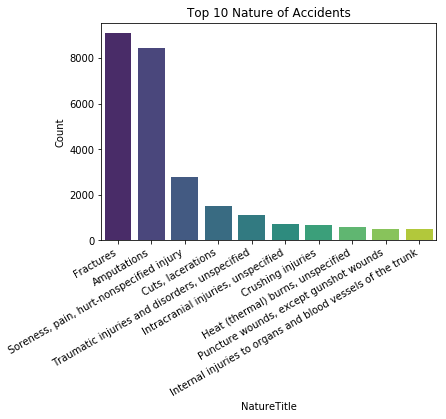

In [318]:
# Group and count rows in each NatureTitle
df_NatureTitle = df.groupby(by='NatureTitle').count().sort_values(by='Nature', ascending=False).reset_index()

ax = sns.barplot(x='NatureTitle', y='ID', data=df_NatureTitle.head(10), palette='viridis')
plt.title('Top 10 Nature of Accidents')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")

This shows the most common types of accidents are fractures and amputations.

[Text(0, 0, 'Finger(s), fingernail(s), n.e.c.'),
 Text(0, 0, 'Fingertip(s)'),
 Text(0, 0, 'Finger(s), fingernail(s), unspecified'),
 Text(0, 0, 'Nonclassifiable'),
 Text(0, 0, 'Multiple body parts, n.e.c.'),
 Text(0, 0, 'BODY SYSTEMS'),
 Text(0, 0, 'Leg(s), unspecified'),
 Text(0, 0, 'Hip(s)'),
 Text(0, 0, 'Brain'),
 Text(0, 0, 'Ankle(s)')]

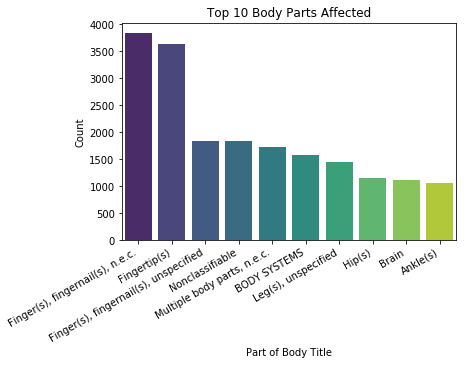

In [319]:
# Group and count rows in each Part of Body Title
df_NatureTitle = df.groupby(by='Part of Body Title').count().sort_values(by='Part of Body', ascending=False).reset_index()

ax = sns.barplot(x='Part of Body Title', y='ID', data=df_NatureTitle.head(10), palette='viridis')
plt.title('Top 10 Body Parts Affected')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")

Fingers are the most common injured body part.

[Text(0, 0, 'Caught in running equipment or machinery during regular operation'),
 Text(0, 0, 'Compressed or pinched by shifting objects or equipment'),
 Text(0, 0, 'Caught in running equipment or machinery during maintenance, cleaning '),
 Text(0, 0, 'Other fall to lower level, unspecified'),
 Text(0, 0, 'Fall on same level due to slipping '),
 Text(0, 0, 'Other fall to lower level less than 6 feet'),
 Text(0, 0, 'Struck against moving part of machinery or equipment'),
 Text(0, 0, 'Fall on same level due to tripping over an object '),
 Text(0, 0, 'Exposure to environmental heat'),
 Text(0, 0, 'Struck by falling object or equipment, n.e.c.')]

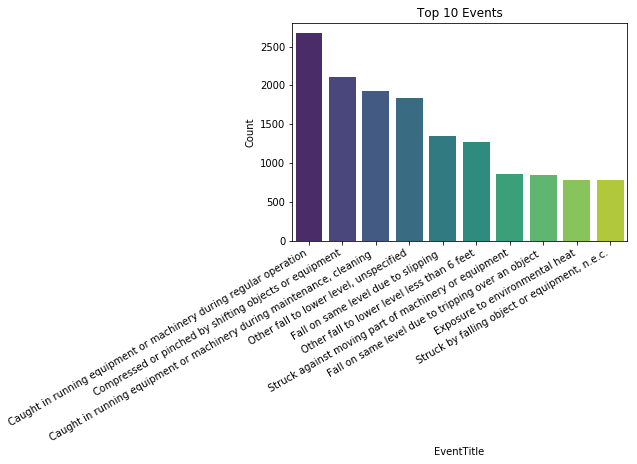

In [320]:
# Group and count rows in each Event Title
df_NatureTitle = df.groupby(by='EventTitle').count().sort_values(by='Event', ascending=False).reset_index()

ax = sns.barplot(x='EventTitle', y='ID', data=df_NatureTitle.head(10), palette='viridis')
plt.title('Top 10 Events')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")

Most of the accidents occurred during the use of equipment. This might suggest operational safety guidelines are not sufficient.

[Text(0, 0, 'Floor, n.e.c.'),
 Text(0, 0, 'Forklift, order picker, platform truck-powered'),
 Text(0, 0, 'Nonclassifiable'),
 Text(0, 0, 'Heat-environmental'),
 Text(0, 0, 'Floors, walkways, ground surfaces, unspecified'),
 Text(0, 0, 'Ladders, unspecified'),
 Text(0, 0, 'Movable ladders, unspecified'),
 Text(0, 0, 'Step ladders'),
 Text(0, 0, 'Machinery, unspecified'),
 Text(0, 0, 'Highway vehicle, motorized, unspecified')]

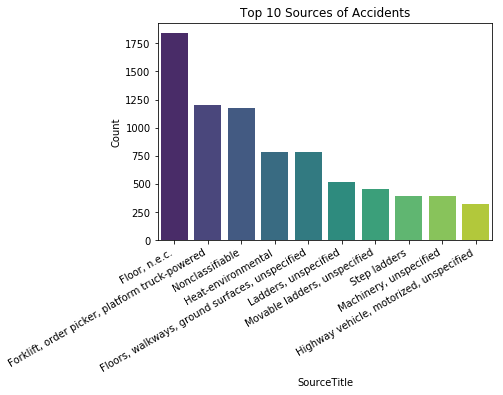

In [321]:
# Group and count rows in each Source Title
df_NatureTitle = df.groupby(by='SourceTitle').count().sort_values(by='Source', ascending=False).reset_index()

ax = sns.barplot(x='SourceTitle', y='ID', data=df_NatureTitle.head(10), palette='viridis')
plt.title('Top 10 Sources of Accidents')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")

### Check which industry has the most accidents per employer

This is important because we identified that accidents were concentrated amongst certain employers which belong to certain industries. Hence, we followed up by checking which industry had the most accidents per employer and will focus on data captured from this industry. This is done to provide targeted insights for the few employers in an industry which result in an unproportianately high number of accidents.

In [322]:
with open('naics-2012.json') as j:
    naics = json.load(j)

def get_industry(code):
    for item in naics['items']:
        if isinstance(code, float):
            return 'Not Applicable'
        if isinstance(code, str) and '-' in code:
            return 'Not Applicable'
        if item['code'] == int(code) and 'title' in item:
            return item['title']
    return 'Not Applicable'
    
df['Industry'] = df['Primary NAICS'].apply(get_industry)

In [323]:
df_industry = df.groupby('Industry').apply(lambda x: x['Employer'].unique()).apply(pd.Series)
df_industry = df_industry.T

In [324]:
# Dataframe for number of employers in each industry
df_emp_per_ind = pd.DataFrame(df_industry.notnull().sum())
df_emp_per_ind = df_emp_per_ind.reset_index()
df_emp_per_ind.columns = ['Industry','Emp_count']
df_emp_per_ind.shape

(974, 2)

In [325]:
# Dataframe for number of accidents per industry
df_count_per_ind = pd.DataFrame(df['Industry'].value_counts())
df_count_per_ind = df_count_per_ind.reset_index()
df_count_per_ind.columns = ['Industry','Industry_count']
df_count_per_ind.shape

(974, 2)

In [326]:
df_ind_emp = pd.merge(df_count_per_ind, df_emp_per_ind, on='Industry')
df_ind_emp['Accident_per_emp'] = df_ind_emp['Industry_count']/df_ind_emp['Emp_count']
df_ind_emp.sort_values(by='Accident_per_emp', ascending=False).head(10)

,Industry,Industry_count,Emp_count,Accident_per_emp
5,Postal Service,557,102,5.460784
726,"Cyclic Crude, Intermediate, and Gum and Wood C...",3,1,3.000000
651,Burial Casket Manufacturing,5,2,2.500000
42,Couriers and Express Delivery Services,154,67,2.298507
119,Local Messengers and Local Delivery,56,26,2.153846
678,Horses and Other Equine Production,4,2,2.000000
847,Power-Driven Handtool Manufacturing,2,1,2.000000
805,Bed-and-Breakfast Inns,2,1,2.000000
827,Real Estate and Rental and Leasing,2,1,2.000000
823,Household and Institutional Furniture Manufact...,2,1,2.000000


From the results, it can be seen that there's an abnormal number of accidents occuring within a small group of postal service companies. This suggests that the accident risk for the postal service industry is higher than normal and insurance companies might want to increase the premium cost / lower payouts for companies in that industry.

## Data Cleaning

### Handling Missing Values

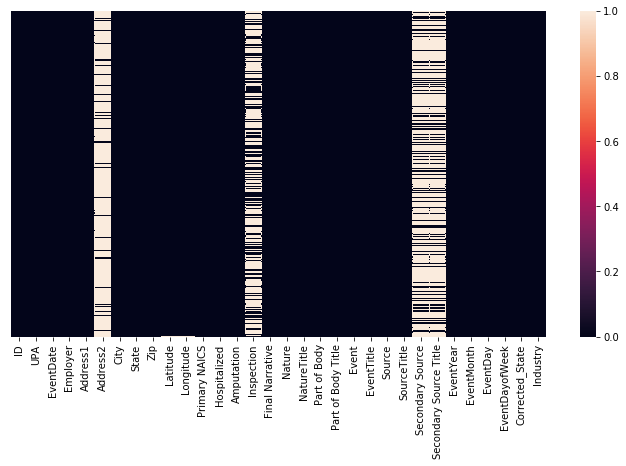

In [327]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), yticklabels=False)

We can see that the missing values are concentrated in 4 columns: Address2, Inspection, Secondary Source and Secondary Source Title.

Hence, we will aim to preserve Address2 & Secondary Source by modifying them into binary options.

In [328]:
print('Number of missing values in Address2: ', df['Address2'].isnull().sum())
print('Number of missing values in Inspection: ', df['Inspection'].isnull().sum())
print('Number of missing values in Secondary Source: ', df['Secondary Source'].isnull().sum())
print('Number of missing values in Secondary Source Title: ', df['Secondary Source Title'].isnull().sum())

Number of missing values in Address2:  28551
Number of missing values in Inspection:  20248
Number of missing values in Secondary Source:  22921
Number of missing values in Secondary Source Title:  22921


In [329]:
df['Have_Address2'] = df['Address2'].notnull().astype('int')
df['Have_SecondarySource'] = df['Secondary Source'].notnull().astype('int')
df = df.drop(labels=['Address2', 'Secondary Source', 'Secondary Source Title'], axis=1)

Insufficient contextual information is given for the Inspection column. Hence, we've have chosen to drop it for now.

In [330]:
df = df.drop(labels=['Inspection', 'Corrected_State'], axis=1)

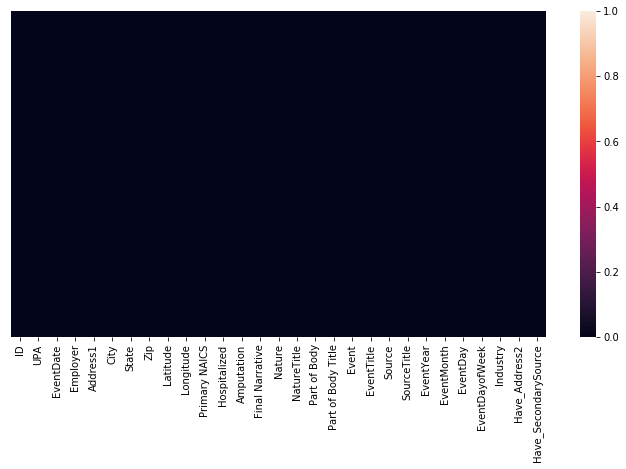

In [331]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), yticklabels=False)

### Handling Erroneous Data

In [332]:
df['Hospitalized'].value_counts()

1    24893
0     6209
2      191
3        4
5        1
Name: Hospitalized, dtype: int64

In [333]:
df['Amputation'].value_counts()

0.0    22879
1.0     8390
2.0       22
3.0        3
9.0        1
4.0        1
Name: Amputation, dtype: int64

Based on the results, we are going to assume that these 2 columns were meant for only contain binary results and that the inputs apart from 0 & 1 are errors.

In [334]:
print('% of errors in {}: {:.2f}%'.format('Hospitalized', len(df[df['Hospitalized'] > 1])/len(df)*100))
print('% of errors in {}: {:.2f}%'.format('Amputation', len(df[df['Amputation'] > 1])/len(df)*100))

% of errors in Hospitalized: 0.63%
% of errors in Amputation: 0.09%


As the number of rows with erroneous data are low, we will drop these rows.

In [335]:
df = df[df['Hospitalized']<2]
df = df[df['Amputation']<2]

In [336]:
len(df)

31076

### Remove unnecessary columns

In [337]:
df.drop(['ID', 'UPA', 'Address1', 'Zip', 'Latitude', 
         'Longitude', 'EventDate', 'Event', 'Source',
        'Part of Body', 'Nature'], axis = 1, inplace = True)

## Reformat Data for SAS

In [338]:
# Reformat to 2 columns (data format accepted by SAS)
idx = list()
target = list()
for index, row in df.iterrows():
    
    if row['Hospitalized'] == 1:
        idx.append(index + 1)
        target.append('Hospitalized') 
        
    if row['Amputation'] == 1:
        idx.append(index + 1)
        target.append('Amputated') 
        
    if row['Have_SecondarySource'] == 1:
        idx.append(index + 1)
        target.append('Have Secondary Source') 
        
    idx.append(index + 1)
    target.append(row['City'])
    
    idx.append(index + 1)
    target.append(row['NatureTitle'])
    
    idx.append(index + 1)
    target.append(row['Part of Body Title'])
    
    idx.append(index + 1)
    target.append(row['EventTitle'])
    
    idx.append(index + 1)
    target.append(row['SourceTitle'])
    
    idx.append(index + 1)
    target.append(row['EventMonth'])
    
    idx.append(index + 1)
    target.append(row['EventDayofWeek'])
    
    idx.append(index + 1)
    target.append(row['Industry'])
    
df_formatted = pd.DataFrame({'id':idx, 'target': target})

In [339]:
df

,Employer,City,State,Primary NAICS,Hospitalized,Amputation,Final Narrative,NatureTitle,Part of Body Title,EventTitle,SourceTitle,EventYear,EventMonth,EventDay,EventDayofWeek,Industry,Have_Address2,Have_SecondarySource
0,FCI Otisville Federal Correctional Institution,OTISVILLE,NEW YORK,922140,1,0.0,Three correctional facility guards were escort...,Fractures,Lower leg(s),Injured by physical contact with person while ...,Co-worker,2015,Jan,1,Thu,Correctional Institutions,0,1
1,Kalahari Manufacturing LLC,LAKE DELTON,WISCONSIN,339999,1,0.0,Employee in the Machine Shop received second d...,Second degree heat (thermal) burns,"Leg(s), n.e.c.","Ignition of vapors, gases, or liquids","Welding, cutting, and blow torches",2015,Jan,1,Thu,All Other Miscellaneous Manufacturing,0,0
2,Schneider National Bulk Carrier,CORAOPOLIS,PENNSYLVANIA,484121,1,0.0,A truck driver fell approximately 4 feet while...,"Traumatic injuries and disorders, unspecified",Nonclassifiable,Other fall to lower level less than 6 feet,"Semi, tractor-trailer, tanker truck",2015,Jan,1,Thu,"General Freight Trucking, Long-Distance, Truck...",0,1
3,PEPSI BOTTLING GROUP INC.,MACON,GEORGIA,424490,1,0.0,An employee's leg was pinned between a truck a...,"Soreness, pain, hurt-nonspecified injury","Leg(s), unspecified",Caught in or compressed by equipment or object...,Pallet jack-powered,2015,Jan,1,Thu,Other Grocery and Related Products Merchant Wh...,0,1
4,North American Pipe Corporation,JANESVILLE,WISCONSIN,326122,1,0.0,An employee working on the Line 6 Auto-Beller ...,Fractures,"Finger(s), fingernail(s), n.e.c.",Caught in running equipment or machinery durin...,"Metal, woodworking, and special material machi...",2015,Jan,1,Thu,Plastics Pipe and Pipe Fitting Manufacturing,0,0
5,"The Home Depot, Inc.",CAPE CORAL,FLORIDA,444110,1,0.0,An employee was hospitalized after slipping an...,"Soreness, pain, hurt-nonspecified injury",Elbow(s),Fall on same level due to slipping,"Floors, walkways, ground surfaces, unspecified",2015,Jan,1,Thu,Home Centers,0,0
6,Gopher Resource,TAMPA,FLORIDA,331492,0,1.0,Employee working the flipping machine at the c...,Amputations,Fingertip(s),Caught in running equipment or machinery durin...,"Special process machinery, unspecified",2015,Jan,1,Thu,"Secondary Smelting, Refining, and Alloying of ...",0,0
7,"Foster Trucking, Inc.",GILL,COLORADO,213112,1,0.0,Employee sustained burns during line tie-in op...,"Heat (thermal) burns, unspecified",Nonclassifiable,Nonclassifiable,Nonclassifiable,2015,Jan,2,Fri,Support Activities for Oil and Gas Operations,0,0
8,Trinidad Drilling,WOODWARD,OKLAHOMA,213111,1,0.0,One employee was hospitalized after being stru...,"Traumatic injuries and disorders, unspecified",Nonclassifiable,"Struck by object or equipment, unspecified","Tires, except bike",2015,Jan,2,Fri,Drilling Oil and Gas Wells,0,0
9,The Krystal Company,ORLANDO,FLORIDA,722211,0,1.0,An associate was using a knife to open a bag o...,Amputations,Fingertip(s),Injured by slipping or swinging object held by...,"Knives, unspecified or n.e.c.",2015,Jan,2,Fri,Not Applicable,0,0


# Export Data

In [340]:
df.to_csv('severeinjury_cleaned.csv')
df_formatted.to_csv('severeinjury_formatted.csv', index=False)